In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(size):
    # linspace 는 a ~ b 까지 숫자 중 n개로 찍어낸다
    x = np.linspace(0,5,size)
    y = x * np.sin(x**2) + 1
    return (x,y)

def sample(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1 + np.random.randn(x.size) * 0.5
    return (x,y)

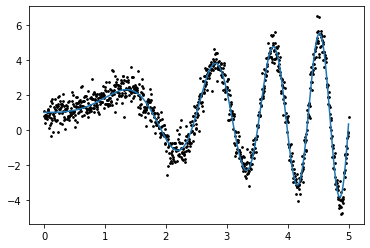

In [3]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
X, y = sample(1000)
plt.scatter(X, y, s = 3, c="black")
plt.show()

In [4]:
# linear regression 을 사용할 때, 반드시 2D로 들어가야하기 때문에 reshape
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X.shape, y.shape

((1000, 1), (1000, 1))

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

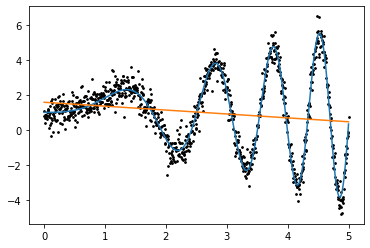

In [6]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
# plot을 해줄 때, 1D 여야 하기 때문에 다시 변환
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X).flatten())
plt.show()

In [7]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2)
X_poly = poly_features.fit_transform(X)
X_poly[:10]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04],
       [1.00000000e+00, 1.50150150e-02, 2.25450676e-04],
       [1.00000000e+00, 2.00200200e-02, 4.00801202e-04],
       [1.00000000e+00, 2.50250250e-02, 6.26251878e-04],
       [1.00000000e+00, 3.00300300e-02, 9.01802704e-04],
       [1.00000000e+00, 3.50350350e-02, 1.22745368e-03],
       [1.00000000e+00, 4.00400400e-02, 1.60320481e-03],
       [1.00000000e+00, 4.50450450e-02, 2.02905608e-03]])

In [11]:
# 절편항이 추가되기 때문에 False 로 해주어야함
lr = LinearRegression(fit_intercept=False)
lr.fit(X_poly,y)

LinearRegression(fit_intercept=False)

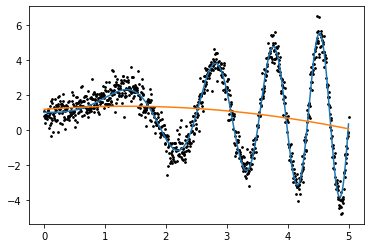

In [12]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

In [19]:
poly_features = PolynomialFeatures(degree=10)
X_poly = poly_features.fit_transform(X)
X_poly[:3]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05, 1.25375751e-07,
        6.27506263e-10, 3.14067198e-12, 1.57190790e-14, 7.86740691e-17,
        3.93764110e-19, 1.97079134e-21, 9.86382051e-24],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04, 1.00300601e-06,
        1.00401002e-08, 1.00501504e-10, 1.00602106e-12, 1.00702808e-14,
        1.00803612e-16, 1.00904517e-18, 1.01005522e-20]])

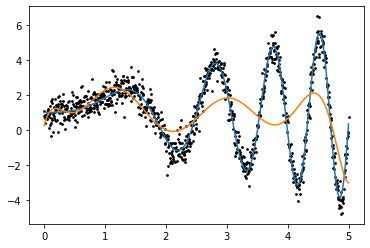

In [20]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X_poly,y)
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

In [22]:
# fitting을 하는 작업
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [23]:
# range를 이용해서 rmse가 가장 작은 것이 나올 때까지 fitting을 해준다.

In [24]:
poly_range = list(range(10, 50))
rmse_lr_list = []
rmse_lasso_list = []
rmse_ridge_list = []

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

for poly_value in poly_range:
    poly_features = PolynomialFeatures(degree=poly_value)
    X_poly = poly_features.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_poly,y)
    
    rmse_lr_list.append(rmse(lr.predict(X_poly), y))

    lasso = Lasso()
    lasso.fit(X_poly,y)
    rmse_lasso_list.append(rmse(lasso.predict(X_poly), y))
    
    ridge = Ridge()
    ridge.fit(X_poly,y)
    rmse_ridge_list.append(rmse(ridge.predict(X_poly), y))

/Users/ihoon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2006.2331209221545, tolerance: 0.4433685475536113
  model = cd_fast.enet_coordinate_descent(
/Users/ihoon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2000.4455394038737, tolerance: 0.4433685475536113
  model = cd_fast.enet_coordinate_descent(
/Users/ihoon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.00523e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/ihoon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You m

/Users/ihoon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1926.6780279653717, tolerance: 0.4433685475536113
  model = cd_fast.enet_coordinate_descent(
/Users/ihoon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1920.0771572008578, tolerance: 0.4433685475536113
  model = cd_fast.enet_coordinate_descent(
/Users/ihoon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1913.2976280175626, tolerance: 0.4433685475536113
  model = cd_fast.enet_coordinate_descent(
/Users/ihoon/opt/anaconda3/lib/python3.8/site-packages/sklearn/line

In [25]:
import pandas as pd
from pandas import DataFrame
#lasso나 ridge보다 lr이 더 작다 -> 더 좋다 -> 데이터를 거의 다 넣었기 때문!
data = {"poly_range":poly_range, "lr_rmse":rmse_lr_list, 
        "lasso_rmse":rmse_lasso_list,"ridge_rmse":rmse_ridge_list}
df = DataFrame(data).set_index("poly_range")
df

,lr_rmse,lasso_rmse,ridge_rmse
poly_range,,,
10,1.869892,2.201842,1.895626
11,1.862130,2.209648,1.874216
12,1.594844,2.214330,1.872253
13,1.304726,2.216883,1.843752
14,1.292006,2.218379,1.665657
15,0.892816,2.219216,1.443695
16,0.703445,2.219592,1.443604
17,0.676061,2.219625,1.266516
18,0.698434,2.219411,0.865371


In [26]:
# 가장 작은 값 = 가장 정확한 값 찾기
df.min()

lr_rmse       0.524942
lasso_rmse    2.201842
ridge_rmse    0.523527
dtype: float64

In [27]:
df["ridge_rmse"].sort_values().head()

poly_range
22    0.523527
23    0.527057
25    0.588370
21    0.598558
24    0.686212
Name: ridge_rmse, dtype: float64

In [28]:
# 가장 유사한 값 degree = 22
poly_features = PolynomialFeatures(degree=22)
X_poly = poly_features.fit_transform(X)
ridge = Ridge(fit_intercept=False)
ridge.fit(X_poly,y)

Ridge(fit_intercept=False)

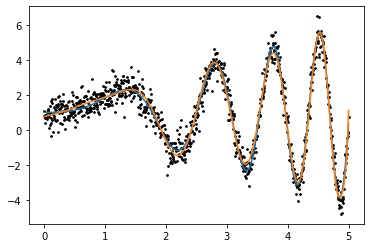

In [29]:
# 결과
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), ridge.predict(X_poly).flatten())
plt.show()